In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
#''Analyse'' : pour charger fichier.csv, calcul matrice, nettoyage, symétrisation, affichage
import Analyse
from Analyse import *

In [3]:
direc = r"ARTE_HSQC/Results/"

In [57]:
Analyse.NETMODE = 'mieux'
# Charger le fichier et ajouter les fonctions nettoie et symetrise :  "[...].csv", net=True, sym=True)
Im1 = loadInt2D(direc + r"ARTEref/2D/hmbcgplpndqf_50_bucketlist.csv", net=True, sym=False)

C:\Users\Standard\Documents\Python\DECPHA\Analyse.py:60: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ne1 = pd.read_csv( epath, header=1, sep = ', ', usecols=[0, 1, 2])


<IPython.core.display.Javascript object>


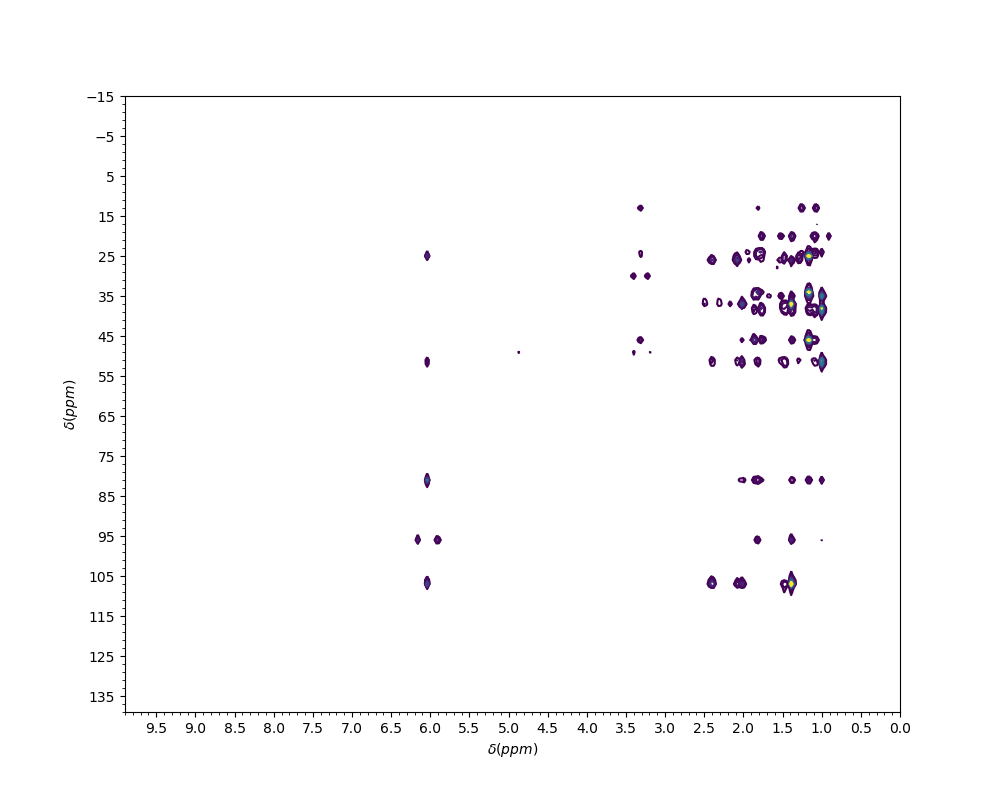

In [58]:
#Pour afficher
affiche2(*Im1, scale=1)

In [60]:
Im2 = loadInt2D(direc + r"ARTE2_160816/2D/hmbcgplpndqf_50_bucketlist.csv", net=True, sym=False)

C:\Users\Standard\Documents\Python\DECPHA\Analyse.py:60: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ne1 = pd.read_csv( epath, header=1, sep = ', ', usecols=[0, 1, 2])


In [7]:
#affiche(Im1[0],Im2[1],Im2[2], scale=10)
#affiche(*Im1, scale=1)

In [8]:
# chargement de la référence (p.e. : artémisinine)
#Ref = loadInt2D(r"ARTEref_161123/Results/ARTEref_161123/2D/cosydfph_10_bucketlist.csv", net=True, sym=True)

# Regression

charger les intensités

je charge les 5 expériences dans X

In [158]:
Analyse.NETMODE = 'mieux'
X = []
for i in range(1,5):
    tit = direc + r"ARTE{}_160816/2D/hmbcgplpndqf_50_bucketlist.csv".format(i)
    print (tit)
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    X.append(tInt)
X = np.array(X)
print (X.shape)

ARTE_HSQC/Results/ARTE1_160816/2D/hmbcgplpndqf_50_bucketlist.csv


C:\Users\Standard\Documents\Python\DECPHA\Analyse.py:60: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ne1 = pd.read_csv( epath, header=1, sep = ', ', usecols=[0, 1, 2])


ARTE_HSQC/Results/ARTE2_160816/2D/hmbcgplpndqf_50_bucketlist.csv
ARTE_HSQC/Results/ARTE3_160816/2D/hmbcgplpndqf_50_bucketlist.csv
ARTE_HSQC/Results/ARTE4_160816/2D/hmbcgplpndqf_50_bucketlist.csv
(4, 46472)


Les valeurs mesurées

In [159]:
Y = np.array([0, 0.15, 0.24, 0.32])/2
y = np.array([0, 25, 50, 75])/100

In [160]:
import sklearn
from sklearn import linear_model

In [140]:
def ty(x, A=2):
    "A defines the slope of the sigmoid"
    val = 0.5 + A*np.arctanh(1*x-1)
    val = np.minimum(val,1.0)
    val = np.maximum(val,0.0)
    return val
x = np.linspace(0.0,1.0,100)
Y = ty(y)
Y

C:\Users\Standard\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until


array([0. , 0. , 0. , 0. , 0.5])

In [161]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
#coefmask = abs(reg.coef_)>1E-14
coefmask = (reg.coef_)>9E-14
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]
len(coefmask),len(tcoefmask),len(coef)

(46472, 76, 76)

<IPython.core.display.Javascript object>


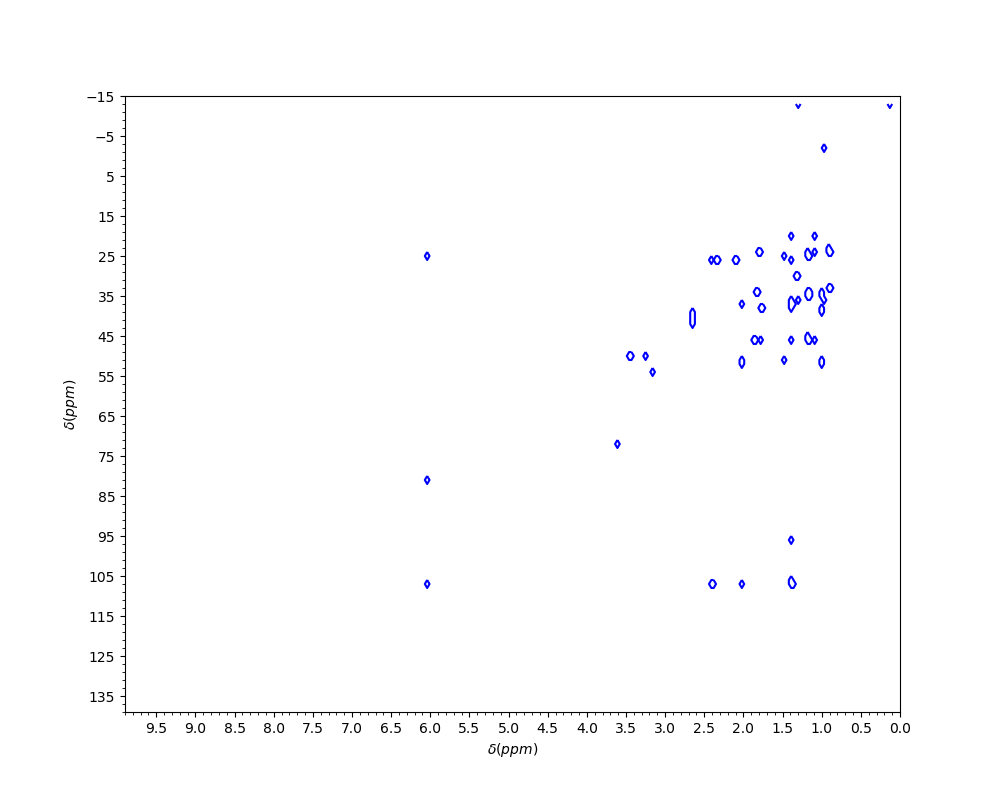

C:\Users\Standard\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [163]:
N = len(Im2[2].ravel())
m = np.zeros(N)
m[tcoefmask] = 1.0
#m[coef] = 1.0
m = m.reshape(Im2[2].shape)
affiche2(Im1[0],Im1[1],m, scale=0.001,cmap=cm.winter)
#affiche(*Ref,new=False,cmap=cm.winter)
#affiche(*Im2,new=False,cmap=cm.spring)
#plt.gca().invert_yaxis()

# même chose avec Recursive Feature Elimination
- step : int or float, optional (default=1)
If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.


In [34]:
from sklearn.feature_selection import RFE
estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=200)
selector = selector.fit(X, Y)

In [35]:
len(selector.support_)

46472

<IPython.core.display.Javascript object>


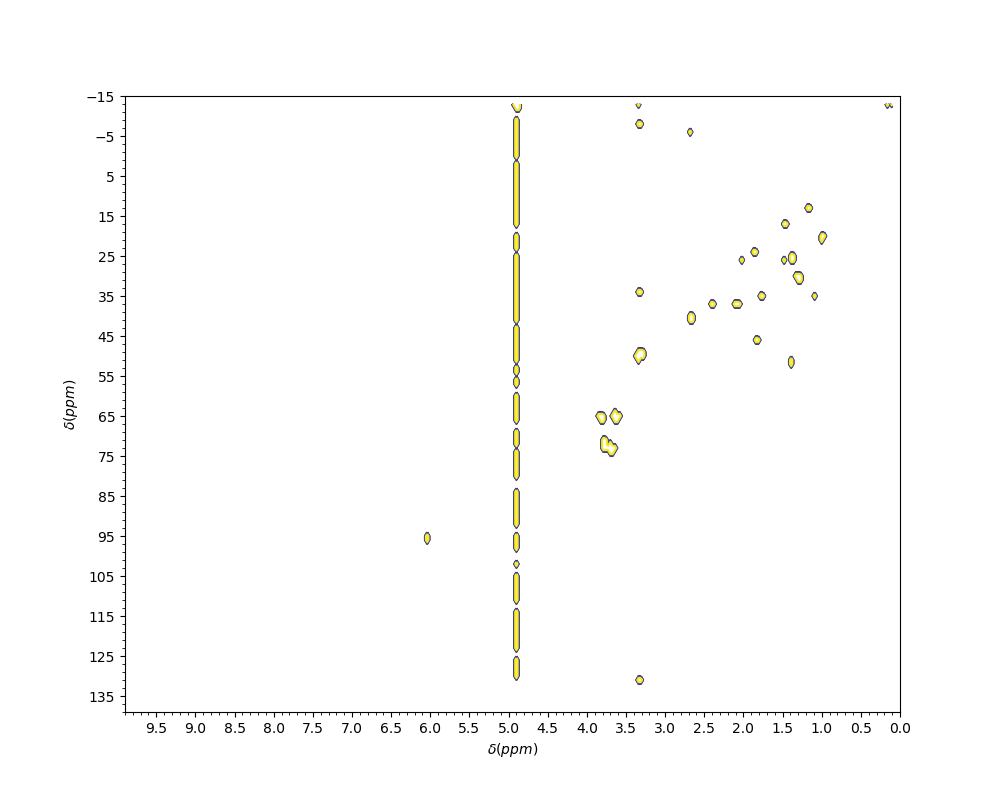

In [37]:
N = len(Im2[2].ravel())
m = np.zeros(N)
m[selector.support_] = 1.0
#m[coef] = 1.0
m = m.reshape(Im2[2].shape)
affiche2(Im1[0],Im1[1],m, scale=0.1)

# for HSQC

In [14]:
H = []
for i in range(1,6):
    tit = direc + r"ARTE{}_160816/2D/hsqcetgp_40_bucketlist.csv".format(i)
    print tit
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    H.append(tInt)
H = np.array(H)
print H.shape
Y4 = Y[:5]

ARTEancien/ARTE_160816/Results/ARTE1_160816/2D/hsqcetgp_40_bucketlist.csv
ARTEancien/ARTE_160816/Results/ARTE2_160816/2D/hsqcetgp_40_bucketlist.csv
ARTEancien/ARTE_160816/Results/ARTE3_160816/2D/hsqcetgp_40_bucketlist.csv
ARTEancien/ARTE_160816/Results/ARTE4_160816/2D/hsqcetgp_40_bucketlist.csv
ARTEancien/ARTE_160816/Results/ARTE5_160816/2D/hsqcetgp_40_bucketlist.csv
(5L, 44247L)


In [15]:
Y4

array([ 0.   ,  0.075,  0.12 ,  0.16 ,  1.   ])

In [16]:
from sklearn.feature_selection import RFE
estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=80)
selector = selector.fit(H, Y)

In [17]:
len(selector.support_)

44247

<IPython.core.display.Javascript object>


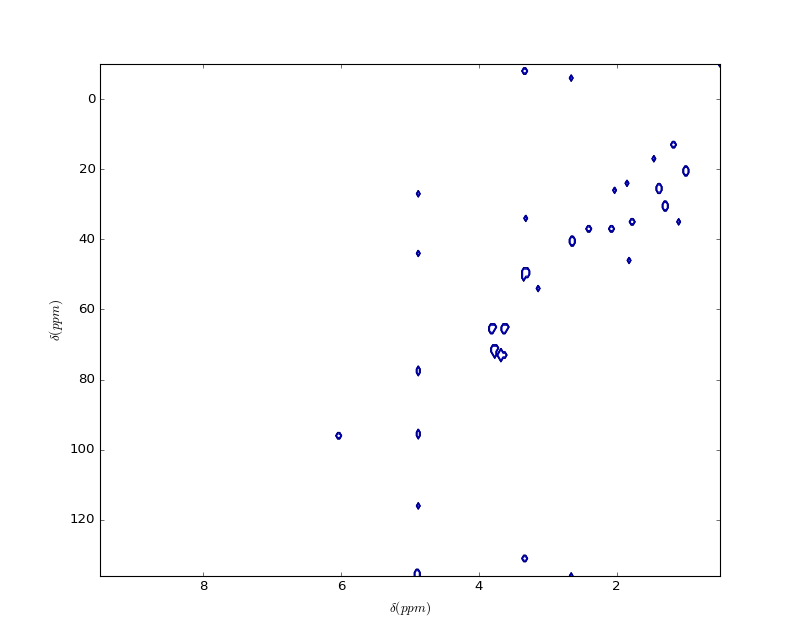

In [18]:
N = len(Int[2].ravel())
m = np.zeros(N)
m[selector.support_] = 1.0
#m[coef] = 1.0
m = m.reshape(Int[2].shape)
affiche(Int[0],Int[1],m, scale=0.1)

# all at once

In [ ]:
import glob
XX = []
YY = []
for i in range(1,6):
    for tit in glob.glob(direc + r"ARTE{}_160816/2D/*_bucketlist.csv".format(i)):
        print tit
        if tit.find('cosy')>=0 or tit.find('dipsi')>=0:
            Int = loadInt2D(tit, net=True, sym=True)
        else:
            Int = loadInt2D(tit, net=True, sym=False)
        tInt = Int[2].ravel() # [tmask]
        XX.append(tInt)
        YY.append(Y[i-1])
#XX = np.array(XX)
YY = np.array(YY)
print XX.shape, YY.shape

In [ ]:
print XX.shape, YY.shape

In [ ]:
estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=3000)
selector = selector.fit(XX, YY)